# S&P500 x FEDFUNDS
## Comportamento do índice de ações americano (S&P500) em ciclos de corte da taxa básica de juros americana (FEDFUNDS)


### Importação de bibliotecas e coleta de dados


In [20]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [21]:
start = '1920-01-01'
#Coleta de dados do S&P500
sp500 = pd.DataFrame(yf.download('^GSPC',start=start,interval='1mo')['Adj Close'])

#Coleta de dados da taca FEDFUNDs
fed_funds = pdr.get_data_fred('fedfunds',start,datetime.today()).dropna()

#Criando base de dados com S&P500 e FEDFUNDS
df_base = pd.concat([sp500,fed_funds],axis=1).dropna()
df_base.rename(columns={'Adj Close':'SP500'},inplace=True)
fedfunds_diff = fed_funds.diff()

#Criando base de dados com datas dos períodos dos ciclos
pivos_start = pd.to_datetime(['1989-03-01','2000-11-01','2007-07-01','2019-07-01'])
pivos_end = pd.to_datetime(['1992-12-01','2003-07-01','2009-01-01','2020-04-01'])

anos_pre = 3
anos_pos = 4
df_pivos = pd.DataFrame({'CUTs':pivos_start,'CUTs_end':pivos_end})
df_pivos['Pos_CUTs'] = df_pivos['CUTs'] + pd.DateOffset(months=12*anos_pos)
df_pivos['Pre_CUTs'] = df_pivos['CUTs'] + pd.DateOffset(months=-12*anos_pre)

sp500_ret_in_cuts = []
sp500_cuts = []
sp500_cuts_ends = []
for i in range(0,len(pivos_start)):
             sp500_ret_in_cuts.append(((df_base.loc[df_pivos['CUTs_end'][i]]['SP500']-df_base.loc[df_pivos['CUTs'][i]]['SP500'])
              /df_base.loc[df_pivos['CUTs'][i]]['SP500']))
             sp500_cuts.append(df_base.loc[df_pivos['CUTs'][i]]['SP500'])
             sp500_cuts_ends.append(df_base.loc[df_pivos['CUTs_end'][i]]['SP500'])

df_sp500_cuts = pd.DataFrame({'SP500_inicio':sp500_cuts,'SP500_final':sp500_cuts_ends,'Ret_SP500':sp500_ret_in_cuts})

[*********************100%%**********************]  1 of 1 completed


### Criando vizualizações
### Vizualização com período de 3 anos antes e 4 anos após o ciclo de corte

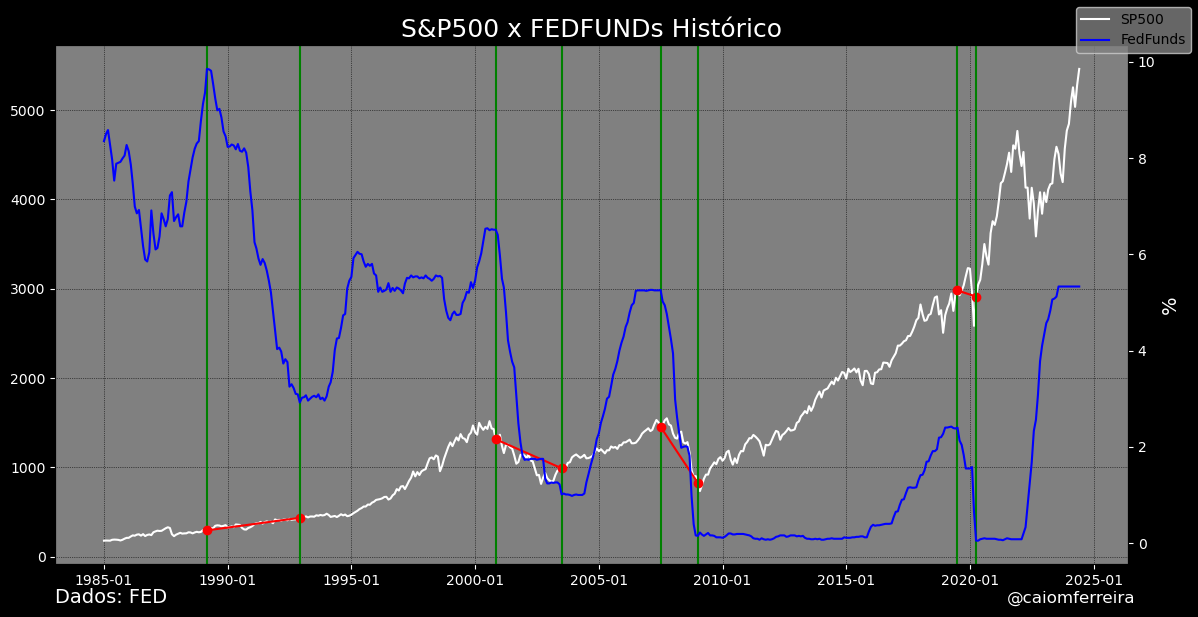

In [22]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titlecolor'] = 'w'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.autolimit_mode'] = 'data'
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.plot(df_base.index,df_base['SP500'],color='w',label='SP500')
for i in range(0,len(pivos_start)):
    ax.axvline(x=pivos_start[i],ymin=0,color='g')
    ax.plot([df_pivos['CUTs'][i],df_pivos['CUTs_end'][i]],
         [df_base.loc[df_pivos['CUTs'][i]]['SP500'], df_base.loc[df_pivos['CUTs_end'][i]]['SP500']],'ro-')
for i in range(0,len(pivos_end)):
    ax.axvline(x=pivos_end[i],ymin=0,color='g')
ax1 = ax.twinx()
ax1.plot(df_base.index,df_base['fedfunds'],color='b',label='FedFunds')
ax.grid()
ax1.set_ylabel('%')
#plt.figlegend()
plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%Y-%m'))
plt.title('S&P500 x FEDFUNDs Histórico',size=18)
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.figtext(0.05,-0.0,'Dados: FED',
            horizontalalignment='left',fontsize=14, color='w')
plt.figtext(0.95,-0.0,'@caiomferreira',horizontalalignment='right',fontsize=12,
        color = 'w')
plt.figlegend()
plt.savefig('SP500xFEDFUNDs Historico.png')
plt.show()

C:\Users\caiof\AppData\Local\Temp\ipykernel_25520\4154747126.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


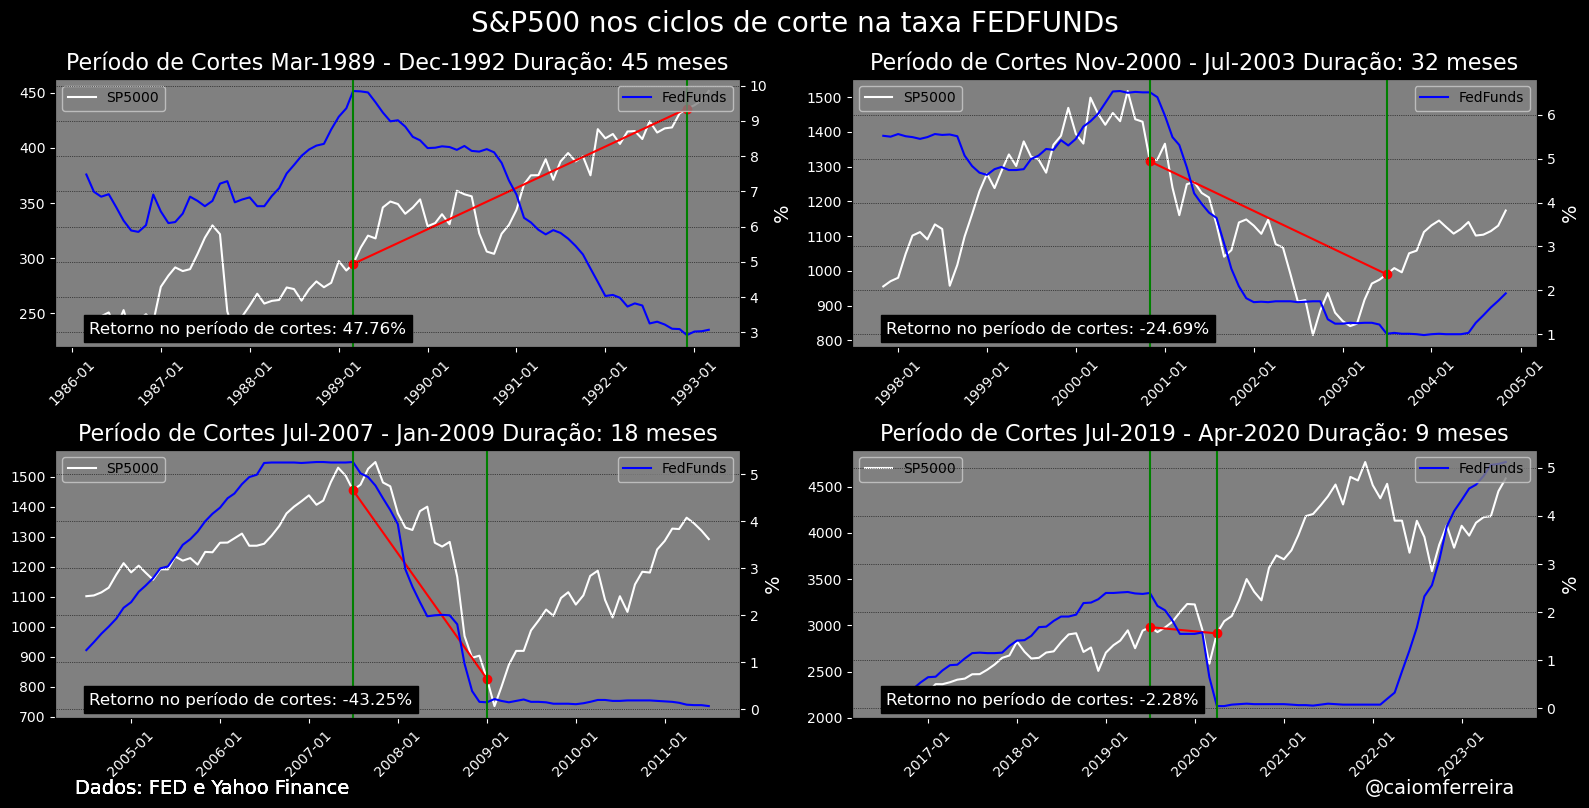

In [23]:

plt.figure(figsize=(16,8)) 
for i, plotn in enumerate(range(221,225)):
 
    diff_time = relativedelta(pivos_end[i],pivos_start[i])
    diff_meses = diff_time.months + diff_time.years *12
    plt.subplot(plotn)
    plt.title(f'Período de Cortes {df_pivos["CUTs"][i].strftime("%b-%Y")} - {df_pivos["CUTs_end"][i].strftime("%b-%Y")} Duração: {diff_meses} meses')
    plt.plot(df_base.loc[df_pivos['Pre_CUTs'][i]:df_pivos['Pos_CUTs'][i]].index,
    df_base.loc[df_pivos['Pre_CUTs'][i]:df_pivos['Pos_CUTs'][i]]['SP500'],color='w',label='SP5000')
    plt.legend(loc='upper left')
    plt.plot([df_pivos['CUTs'][i],df_pivos['CUTs_end'][i]],
    [df_base.loc[df_pivos['CUTs'][i]]['SP500'], df_base.loc[df_pivos['CUTs_end'][i]]['SP500']],'ro-')
    plt.xticks(rotation = 45)
    plt.twinx()
    plt.ylabel('%')
    plt.grid()
    plt.plot(df_base.loc[df_pivos['Pre_CUTs'][i]:df_pivos['Pos_CUTs'][i]].index,
    df_base.loc[df_pivos['Pre_CUTs'][i]:df_pivos['Pos_CUTs'][i]]['fedfunds'],color='b',label='FedFunds')
    plt.axvline(df_pivos['CUTs'][i],ymin=0,color='g')
    plt.axvline(df_pivos['CUTs_end'][i],ymin=0,color='g')
    plt.annotate(f'Retorno no período de cortes: {df_sp500_cuts["Ret_SP500"][i]:.2%}', 
        xy=(0.05, 0.05),
        xycoords='axes fraction',
        fontsize=12, 
        color='w',
        bbox=dict(facecolor='black'))
    plt.legend(loc='upper right')
    plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%Y-%m'))
    plt.suptitle('S&P500 nos ciclos de corte na taxa FEDFUNDs',color='w',size=20)
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()
    plt.figtext(0.05,-0.0,'Dados: FED e Yahoo Finance',
            horizontalalignment='left',fontsize=14, color='w')
plt.figtext(0.95,-0.0,'@caiomferreira',horizontalalignment='right',fontsize=14,
        color = 'w')
plt.savefig('SP500 nos ciclos de Corte.png')
plt.show()

